In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.fft import fft, ifft
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [3]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


<b>1. Data Transformation:</b>

In [19]:
scaler = StandardScaler()
ninja_data["Time_aux"] = scaler.fit_transform(ninja_data["Time"].values.reshape(-1, 1))
ninja_data["Temperature_aux"] = scaler.fit_transform(ninja_data["Temperature"].values.reshape(-1, 1))
ninja_data["Pressure_aux"] = scaler.fit_transform(ninja_data["Pressure"].values.reshape(-1, 1))
ninja_data["Chemical_Concentration"] = scaler.fit_transform(ninja_data["Chemical Concentration"].values.reshape(-1, 1))

In [20]:
print(ninja_data['Time_aux'].mean())
print(ninja_data['Temperature_aux'].mean())
print(ninja_data['Pressure_aux'].mean())
print(ninja_data['Chemical_Concentration'].mean())

print(ninja_data['Time_aux'].std())
print(ninja_data['Temperature_aux'].std())
print(ninja_data['Pressure_aux'].std())
print(ninja_data['Chemical_Concentration'].std())

6.52811138479592e-17
-5.567421523799965e-16
1.2034817586936698e-16
-4.572123929458272e-16
1.000500375312773
1.000500375312774
1.0005003753127735
1.0005003753127741


In [24]:
data = ninja_data['Time_aux'].to_numpy()  # Convert the pandas Series to a NumPy array

# Perform Fast Fourier Transform (FFT)
fft_data = fft(data)  # Apply FFT to get frequency components
fft_data_abs = np.abs(fft_data)  # Absolute values represent magnitude

In [25]:
print(fft_data)

[ 1.02362563e-13-0.00000000e+00j -1.73205167e+00+5.51327357e+02j
 -1.73205167e+00+2.75660958e+02j -1.73205167e+00+1.83770949e+02j
 -1.73205167e+00+1.37825037e+02j -1.73205167e+00+1.10256765e+02j
 -1.73205167e+00+9.18773121e+01j -1.73205167e+00+7.87486131e+01j
 -1.73205167e+00+6.89016354e+01j -1.73205167e+00+6.12424717e+01j
 -1.73205167e+00+5.51147779e+01j -1.73205167e+00+5.01008803e+01j
 -1.73205167e+00+4.59223299e+01j -1.73205167e+00+4.23863542e+01j
 -1.73205167e+00+3.93552586e+01j -1.73205167e+00+3.67280670e+01j
 -1.73205167e+00+3.44290475e+01j -1.73205167e+00+3.24002872e+01j
 -1.73205167e+00+3.05967430e+01j -1.73205167e+00+2.89828544e+01j
 -1.73205167e+00+2.75301730e+01j -1.73205167e+00+2.62156692e+01j
 -1.73205167e+00+2.50205005e+01j -1.73205167e+00+2.39291016e+01j
 -1.73205167e+00+2.29285011e+01j -1.73205167e+00+2.20078032e+01j
 -1.73205167e+00+2.11577883e+01j -1.73205167e+00+2.03706028e+01j
 -1.73205167e+00+1.96395149e+01j -1.73205167e+00+1.89587214e+01j
 -1.73205167e+00+1.832319

<b>2. Statistical Analysis:</b>

In [26]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration,Time_aux,Temperature_aux,Pressure_aux,Chemical_Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,50.000000,19.977372,1013.033617,4.989754,6.528111e-17,-5.567422e-16,1.203482e-16,-4.572124e-16
std,28.910854,3.574943,14.203350,1.436505,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,0.000000,13.897407,990.284418,2.559310,-1.730320e+00,-1.701567e+00,-1.602480e+00,-1.692762e+00
25%,25.000000,16.386984,998.852247,3.576024,-8.651598e-01,-1.004823e+00,-9.989521e-01,-9.846385e-01
50%,50.000000,20.008666,1012.950967,4.970976,1.229485e-16,8.758279e-03,-5.821975e-03,-1.307840e-02
75%,75.000000,23.570373,1027.062114,6.398067,8.651598e-01,1.005554e+00,9.881835e-01,9.808653e-01
max,100.000000,26.030294,1035.471676,7.486763,1.730320e+00,1.693999e+00,1.580563e+00,1.739122e+00


In [27]:
correlation_matrix = ninja_data.corr()

print(correlation_matrix)

                            Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   
Time_aux                1.000000    -0.770696 -0.001946   
Temperature_aux        -0.770696     1.000000  0.007112   
Pressure_aux           -0.001946     0.007112  1.000000   
Chemical_Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Concentration  Time_aux  Temperature_aux  \
Time                                 -0.156113  1.000000        -0.770696   
Temperature                          -0.003277 -0.770696         1.000000   
Pressure                             -0.000863 -0.001946         0.007112   
Chemical Concentration                1.000000 -0.156113        -0.003277   
Time_aux                             -0.156113  1.000000        -0.770696   
Temper

Time has perfect negative correlation with temperature, meaning the variables move in opposite directions.<br>
The rest doesnt have a correlation

<b>3. Data Visualization:</b>

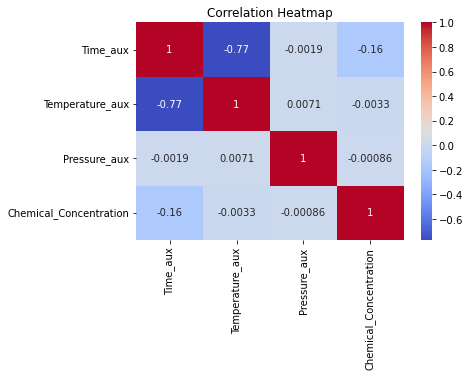

In [33]:
correlation_matrix = ninja_data[['Time_aux', 'Temperature_aux', 'Pressure_aux', 'Chemical_Concentration']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 

plt.title("Correlation Heatmap")
plt.show()

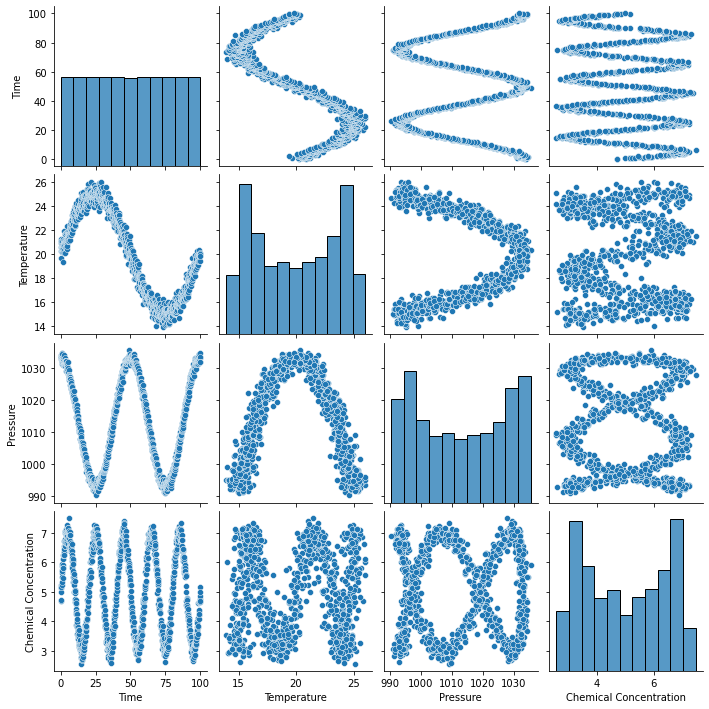

In [37]:
sns.pairplot(ninja_data[['Time', 'Temperature', 'Pressure', 'Chemical Concentration']])
plt.show()

Its clear to observe with time as independent variable the minimun and maximus values for the other variables<br>
The frequency of the funcion time-pressure its the half from time-temperature and chemical concentracion has half the frequency of pressure-time

<b>4. Interpretation:</b>

After watching the plot between the variables its clear that it doesnt exists a lineal relation between them but a sinusoidal relation. <br>
We can see the maxs and mins values of the variables when time is the independent variable.